In [1]:
!wget https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-mp4-file.mp4

--2020-06-18 14:42:15--  https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-mp4-file.mp4
Resolving www.learningcontainer.com (www.learningcontainer.com)... 104.27.172.148, 104.27.173.148, 172.67.188.164
Connecting to www.learningcontainer.com (www.learningcontainer.com)|104.27.172.148|:443...connected.
HTTP request sent, awaiting response...200 OK
Length: 10546620 (10M) [video/mp4]
Saving to: ‘sample-mp4-file.mp4.2’

sample-mp4-file.mp4 100%[===================>]  10.06M  10.6MB/s    in 0.9s    

2020-06-18 14:42:16 (10.6 MB/s) - ‘sample-mp4-file.mp4.2’ saved [10546620/10546620]



In [6]:
!ffmpeg -i sample-mp4-file.mp4 sample-mp4-file.wav

ffmpeg version 4.0 Copyright (c) 2000-2018 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/Users/imadtoubal/anaconda3/envs/dlib --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-shared --enable-static --enable-zlib --enable-pic --enable-gpl --enable-version3 --disable-nonfree --enable-hardcoded-tables --enable-avresample --enable-libfreetype --disable-openssl --disable-gnutls --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --disable-libx264
  libavutil      56. 14.100 / 56. 14.100
  libavcodec     58. 18.100 / 58. 18.100
  libavformat    58. 12.100 / 58. 12.100
  libavdevice    58.  3.100 / 58.  3.100
  libavfilter     7. 16.100 /  7. 16.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  1.100 /  5.  1.100
  libswresample   3.  1.100 /  3.  1.100
  libpostproc    55.  1.100 / 55.  1.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'sample-mp4-file.mp4':
  Metadata:
    major_brand     :

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

<class 'int'> 1024
timebins:  70848
freqbins:  513


TypeError: can't multiply sequence by non-int of type 'float'

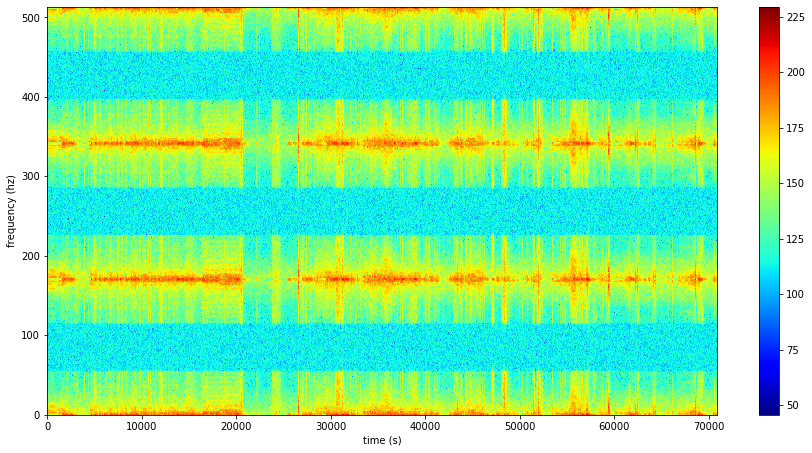

In [2]:
from spectogram import *
import scipy.io.wavfile as wav
import numpy as np

audiopath = 'sample-mp4-file.wav'
binsize=2**10, 
plotpath=None, 
colormap="jet"
samplerate, samples = wav.read(audiopath)

s = stft(samples, binsize)

sshow, freq = logScaleSpec(s, factor=1.0, sr=samplerate)

ims = 20.*np.log10(np.abs(sshow)/10e-6)  # amplitude to decibel

timebins, freqbins = np.shape(ims)

print("timebins: ", timebins)
print("freqbins: ", freqbins)

plt.figure(figsize=(15, 7.5))
plt.imshow(np.transpose(ims), origin="lower", aspect="auto",
           cmap=colormap, interpolation="none")
plt.colorbar()

plt.xlabel("time (s)")
plt.ylabel("frequency (hz)")
plt.xlim([0, timebins-1])
plt.ylim([0, freqbins])

xlocs = np.float32(np.linspace(0, timebins-1, 5))
plt.xticks(xlocs, ["%.02f" % l for l in (
    (xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

if plotpath:
    plt.savefig(plotpath, bbox_inches="tight")
else:
    plt.show()

plt.clf()

<class 'int'> 1024
timebins:  10849
freqbins:  513


TypeError: can't multiply sequence by non-int of type 'float'

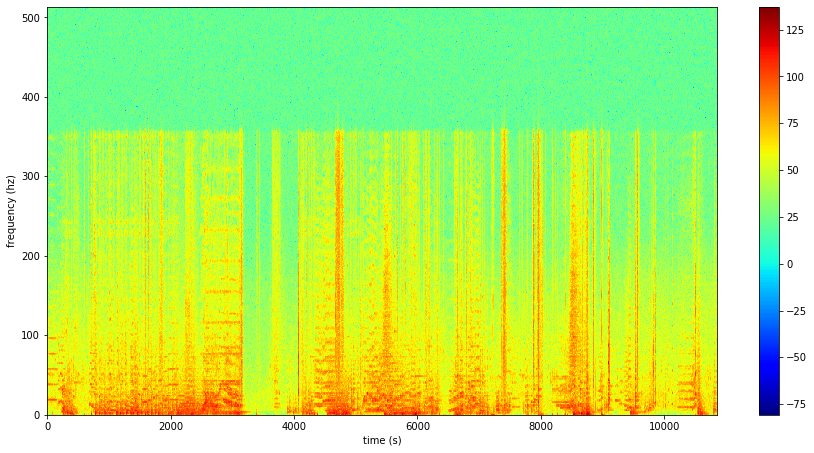

In [23]:
from moviepy.editor import *

binsize=2**10, 
plotpath=None, 
colormap="jet"

videoclip = VideoFileClip("sample-mp4-file.mp4")
samples = videoclip.audio.to_soundarray()[:,0]
samplerate = 48000

s = stft(samples, binsize)

sshow, freq = logScaleSpec(s, factor=1.0, sr=samplerate)

ims = 20.*np.log10(np.abs(sshow)/10e-6)  # amplitude to decibel

timebins, freqbins = np.shape(ims)

print("timebins: ", timebins)
print("freqbins: ", freqbins)

plt.figure(figsize=(15, 7.5))
plt.imshow(np.transpose(ims), origin="lower", aspect="auto",
           cmap=colormap, interpolation="none")
plt.colorbar()

plt.xlabel("time (s)")
plt.ylabel("frequency (hz)")
plt.xlim([0, timebins-1])
plt.ylim([0, freqbins])

xlocs = np.float32(np.linspace(0, timebins-1, 5))
plt.xticks(xlocs, ["%.02f" % l for l in (
    (xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

if plotpath:
    plt.savefig(plotpath, bbox_inches="tight")
else:
    plt.show()

plt.clf()

In [24]:
from fourier import *

In [25]:
import cv2

def read_video(filename):
  vidcap = cv2.VideoCapture(filename)
  success, image = vidcap.read()
  count = 0
  images = []
  while success:
    images.append(image)
    success, image = vidcap.read()
    count += 1

  return np.stack(images)

In [26]:
vid = read_video('sample-mp4-file.mp4')
vid = vid.mean(axis=-1) / 255
vid.shape

(1889, 240, 320)

In [27]:
def show_video(vid, m=2, n=5, s=4):
  plt.figure(figsize=(n * s, m * s))
  for i in range(m * n):
    plt.subplot(m, n, i + 1)
    plt.imshow(vid[3*i], cmap='gray') # skip 2 frames

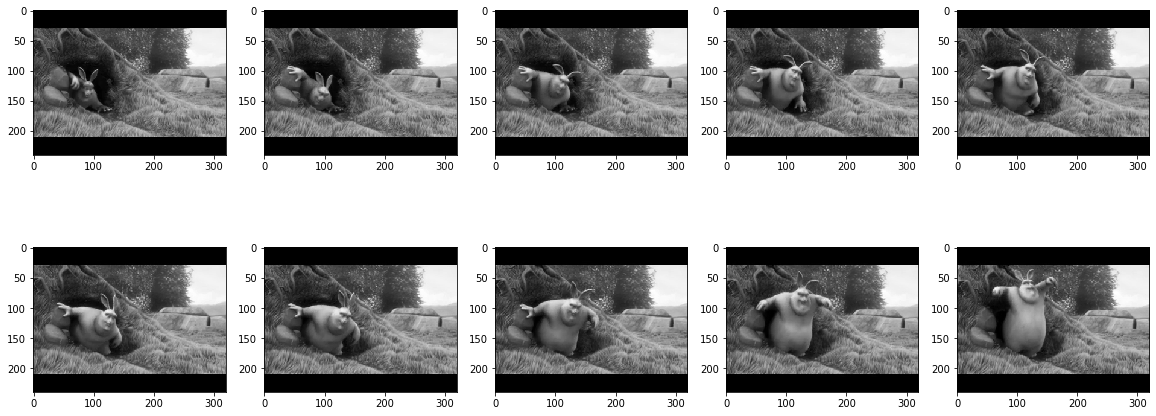

In [28]:
show_video(vid)

In [29]:
spects = []
for i in range(vid.shape[0]):
  img = vid[i]
  spect = getPoweSpectrum(img)
  spects.append(spect)

In [30]:
spects = np.stack(spects)
spects.shape

(1889, 198)

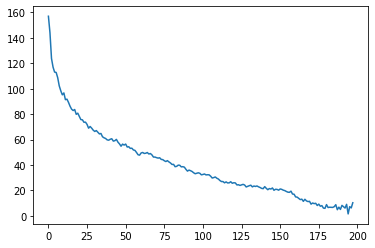

In [31]:
plt.plot(spects[0])

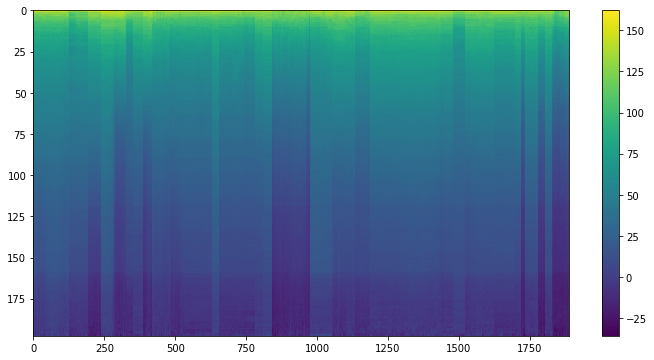

In [32]:
plt.figure(figsize=(12, 6))
plt.imshow(spects.transpose(), aspect='auto', interpolation='nearest')
plt.colorbar()

In [16]:
from moviepy.editor import *
videoclip = VideoFileClip("sample-mp4-file.mp4")
audio = videoclip.audio.to_soundarray()
videoclip.audio.fps

44100

In [4]:
samplerate, samples = wav.read("sample-mp4-file.wav")

In [9]:
samples.shape, samplerate

((6045696, 6), 48000)

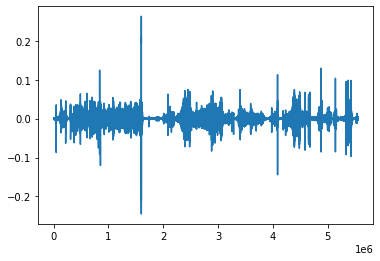

In [86]:
plt.plot(audio[:, 1])

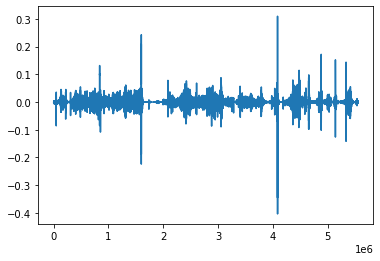

In [87]:
plt.plot(audio[:, 0])